# Graph Theory and Geometry of Networks

These notes introduce **basic network analysis**, together with **topological** (Euler characteristic) and **geometric** (Forman–Ricci curvature) ideas for graphs. The material is aimed at an **introductory undergraduate course**, with emphasis on intuition, definitions, and simple computations using `networkx`.

Throughout, we use a **real-world inspired network** available in `networkx`: the **Zachary Karate Club graph**, a classic social network describing friendships between members of a karate club.

---

## 1. The Example Network: Zachary Karate Club

The **Zachary Karate Club graph** models social interactions between 34 members of a karate club. Nodes represent individuals, and edges represent social ties.

This network is widely used because:

* it is small and easy to visualize;
* it comes from real data;
* it exhibits nontrivial structure (communities, hubs, etc.).

```python
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

plt.figure(figsize=(6,5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=600)
plt.title("Zachary Karate Club Network")
plt.show()
```

---

## 2. Basic Quantities in Network Theory

Let $G = (V,E)$ be a graph, where $V$ is the set of nodes and $E$ the set of edges.

### 2.1 Number of Nodes and Edges

* **Number of nodes**: $|V|$
* **Number of edges**: $|E|$

```python
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
```

**Interpretation:**

* Nodes correspond to individuals.
* Edges correspond to social interactions.

---

### 2.2 Node Degree

The **degree** of a node is the number of edges incident to it.

Mathematically, for a node $v$:
[\deg(v) = |{u \in V : (u,v) \in E}|.]

```python
degrees = dict(G.degree())
print(degrees)
```

Nodes with high degree represent **highly connected individuals**.

---

### 2.3 Degree Centrality

**Degree centrality** normalizes the degree by the maximum possible degree:
[
C_D(v) = \frac{\deg(v)}{|V|-1}.
]

```python
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)
```

**Interpretation:**

* Values close to 1 indicate very influential or central nodes.
* Values close to 0 indicate peripheral nodes.

---

### 2.4 Network Density

The **density** measures how close the graph is to being complete:
[
\text{density}(G) = \frac{2|E|}{|V|(|V|-1)}.
]

```python
density = nx.density(G)
print("Network density:", density)
```

**Interpretation:**

* Low density: sparse network.
* High density: many connections.

---

## 3. From Graphs to Topology: Cliques and Simplices

A **clique** is a set of nodes that are all mutually connected.

* 1-node clique: vertex
* 2-node clique: edge
* 3-node clique: triangle
* 4-node clique: tetrahedron (in the abstract sense)

Cliques allow us to interpret a graph as a **simplicial complex**, enabling topological analysis.

---

### 3.1 Generating Cliques

```python
import itertools

def all_cliques_generator(G, k):
    """Generate all cliques up to size k+1."""
    maximal_cliques = list(nx.find_cliques(G))
    cliques = [tuple(sorted(c)) for c in maximal_cliques]

    simplices = []
    for i in range(k + 1):
        simplices.extend(
            list(set(c for mc in cliques for c in itertools.combinations(mc, i + 1)))
        )

    for s in simplices:
        yield s
```

---

## 4. Euler Characteristic of a Network

The **Euler characteristic** is a fundamental topological invariant.

For a simplicial complex:
$
\chi = \sum_{k \ge 0} (-1)^k , f_k,
$
where $f_k$ is the number of $k$-dimensional simplices:

* $f_0$: nodes
* $f_1$: edges
* $f_2$: triangles
* etc.

---

### 4.1 Euler Characteristic via Cliques

```python
def euler_characteristic(G, k):
    euler = 0
    L = all_cliques_generator(G, k)

    while True:
        try:
            c = next(L)
            euler += (-1) ** (len(c) - 1)
        except StopIteration:
            break

    return euler

print("Euler characteristic:", euler_characteristic(G, 4))
```

**Interpretation:**

* Combines information about nodes, edges, triangles, and higher-order structures.
* Sensitive to loops, holes, and clustering in the network.

---

## 5. Geometry on Graphs: Forman–Ricci Curvature

Curvature measures how a space deviates from being flat.

The **Forman–Ricci curvature** is a discrete analogue of Ricci curvature, defined on **edges** of a graph. Intuitively:

* **Positive curvature**: tightly connected regions (clique-like)
* **Negative curvature**: bridge-like or tree-like connections

---

### 5.1 Computing Forman–Ricci Curvature

```python
from GraphRicciCurvature.FormanRicci import FormanRicci

frc = FormanRicci(G)
frc.compute_ricci_curvature()

edge_curvatures = nx.get_edge_attributes(frc.G, "formanCurvature")
print(edge_curvatures)
```

---

### 5.2 Visualizing Curvature on the Network

```python
import matplotlib as mpl

edge_weights = [d["formanCurvature"] for _, _, d in frc.G.edges(data=True)]

cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_colors = [cmap(norm(w)) for w in edge_weights]

fig, ax = plt.subplots(figsize=(6,5))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    edge_color=edge_colors,
    width=2,
    node_color="lightgray",
    node_size=600
)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Forman–Ricci Curvature")

plt.title("Forman–Ricci Curvature on the Karate Club Network")
plt.show()
```

---

## 6. Summary and Interpretation

* **Graph theory** provides basic descriptors (degree, centrality, density).
* **Topology** (Euler characteristic) captures higher-order connectivity beyond edges.
* **Geometry** (Forman–Ricci curvature) reveals local structural roles of edges.

Together, these tools allow us to analyze networks not only as collections of nodes and edges, but as **geometric and topological objects**.

---

## 7. Suggested Exercises

1. Compute the Euler characteristic using different values of `k`. How does it change?
2. Identify edges with most negative curvature. What is their role in the network?
3. Compare degree centrality with curvature: are highly connected nodes always in positively curved regions?
4. Repeat the analysis for another real network in `networkx` (e.g. `nx.dolphins_graph()`).


# Graph Theory and Geometry of Networks

These notes introduce **basic network analysis**, together with **topological** (Euler characteristic) and **geometric** (Forman–Ricci curvature) ideas for graphs. The material is aimed at an **introductory undergraduate course**, with emphasis on intuition, definitions, and simple computations using `networkx`.

Throughout, we use a **real-world inspired network** available in `networkx`: the **Zachary Karate Club graph**, a classic social network describing friendships between members of a karate club.

---

## 1. The Example Network: Zachary Karate Club

The **Zachary Karate Club graph** models social interactions between 34 members of a karate club. Nodes represent individuals, and edges represent social ties.

This network is widely used because:

* it is small and easy to visualize;
* it comes from real data;
* it exhibits nontrivial structure (communities, hubs, etc.).

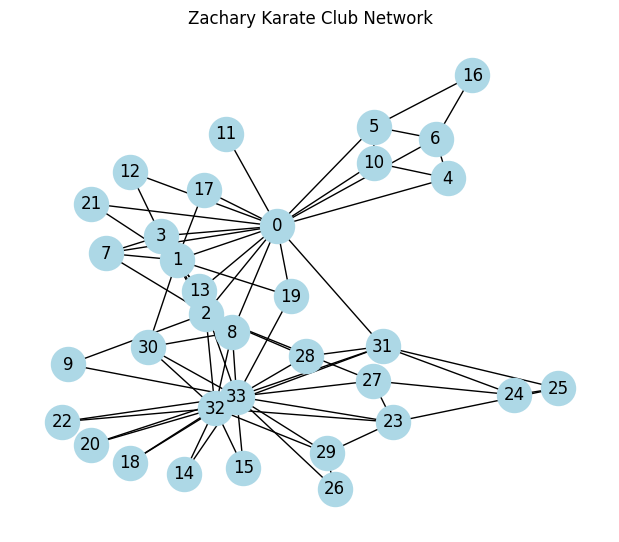

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
G=nx.from_numpy_array(nx.to_numpy_array(G,weight=None))

plt.figure(figsize=(6,5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=600)
plt.title("Zachary Karate Club Network")
plt.show()

## 2. Basic Quantities in Network Theory

Let $G = (V,E)$ be a graph, where $V$ is the set of nodes and $E$ the set of edges.

### 2.1 Number of Nodes and Edges

* **Number of nodes**: $|V|$
* **Number of edges**: $|E|$



In [4]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 34
Number of edges: 78



**Interpretation:**

* Nodes correspond to individuals.
* Edges correspond to social interactions.

---

### 2.2 Node Degree

The **degree** of a node is the number of edges incident to it.

Mathematically, for a node $v$:
$\deg(v) = |{u \in V : (u,v) \in E}|.$

In [5]:
degrees = dict(G.degree())
print(degrees)

{0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


Nodes with high degree represent **highly connected individuals**.

---

### 2.3 Degree Centrality

**Degree centrality** normalizes the degree by the maximum possible degree:
$
C_D(v) = \frac{\deg(v)}{|V|-1}.
$

In [6]:
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)

{0: 0.48484848484848486, 1: 0.2727272727272727, 2: 0.30303030303030304, 3: 0.18181818181818182, 4: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.15151515151515152, 9: 0.06060606060606061, 10: 0.09090909090909091, 11: 0.030303030303030304, 12: 0.06060606060606061, 13: 0.15151515151515152, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.09090909090909091, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.15151515151515152, 24: 0.09090909090909091, 25: 0.09090909090909091, 26: 0.06060606060606061, 27: 0.12121212121212122, 28: 0.09090909090909091, 29: 0.12121212121212122, 30: 0.12121212121212122, 31: 0.18181818181818182, 32: 0.36363636363636365, 33: 0.5151515151515151}



**Interpretation:**

* Values close to 1 indicate very influential or central nodes.
* Values close to 0 indicate peripheral nodes.

---

### 2.4 Network Density

The **density** measures how close the graph is to being complete:
$
\text{density}(G) = \frac{2|E|}{|V|(|V|-1)}.
$


In [7]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.13903743315508021


**Interpretation:**

* Low density: sparse network.
* High density: many connections.

---

## 3. From Graphs to Topology: Cliques and Simplices

A **clique** is a set of nodes that are all mutually connected.

* 1-node clique: vertex
* 2-node clique: edge
* 3-node clique: triangle
* 4-node clique: tetrahedron (in the abstract sense)

Cliques allow us to interpret a graph as a **simplicial complex**, enabling topological analysis.

---

### 3.1 Generating Cliques

In [8]:
import itertools

def all_cliques_generator(G, k):
    """Generate all cliques up to size k+1."""
    maximal_cliques = list(nx.find_cliques(G))
    cliques = [tuple(sorted(c)) for c in maximal_cliques]

    simplices = []
    for i in range(k + 1):
        simplices.extend(
            list(set(c for mc in cliques for c in itertools.combinations(mc, i + 1)))
        )

    for s in simplices:
        yield s

--

## 4. Euler Characteristic of a Network

The **Euler characteristic** is a fundamental topological invariant.

For a simplicial complex:
$
\chi = \sum_{k \ge 0} (-1)^k , f_k,
$
where $f_k$ is the number of $k$-dimensional simplices:

* $f_0$: nodes
* $f_1$: edges
* $f_2$: triangles
* etc.

---

### 4.1 Euler Characteristic via Cliques

In [9]:
def euler_characteristic(G, k):
    euler = 0
    L = all_cliques_generator(G, k)

    while True:
        try:
            c = next(L)
            euler += (-1) ** (len(c) - 1)
        except StopIteration:
            break

    return euler

print("Euler characteristic:", euler_characteristic(G, 4))

Euler characteristic: -8



**Interpretation:**

* Combines information about nodes, edges, triangles, and higher-order structures.
* Sensitive to loops, holes, and clustering in the network.

---

## 5. Geometry on Graphs: Forman–Ricci Curvature

Curvature measures how a space deviates from being flat.

The **Forman–Ricci curvature** is a discrete analogue of Ricci curvature, defined on **edges** of a graph. Intuitively:

* **Positive curvature**: tightly connected regions (clique-like)
* **Negative curvature**: bridge-like or tree-like connections

---

### 5.1 Computing Forman–Ricci Curvature

In [21]:
from GraphRicciCurvature.FormanRicci import FormanRicci

frc = FormanRicci(G)
frc.compute_ricci_curvature()

edge_curvatures = nx.get_edge_attributes(frc.G, "formanCurvature")
print(edge_curvatures)

{(0, 1): 0.0, (0, 2): -7.0, (0, 3): -3.0, (0, 4): -9.0, (0, 5): -10.0, (0, 6): -10.0, (0, 7): -7.0, (0, 8): -14.0, (0, 10): -9.0, (0, 11): -13.0, (0, 12): -11.0, (0, 13): -8.0, (0, 17): -11.0, (0, 19): -12.0, (0, 21): -11.0, (0, 31): -18.0, (1, 2): -3.0, (1, 3): 1.0, (1, 7): 0.0, (1, 13): -1.0, (1, 17): -4.0, (1, 19): -5.0, (1, 21): -4.0, (1, 30): -9.0, (2, 3): 0.0, (2, 7): -1.0, (2, 8): -5.0, (2, 9): -8.0, (2, 13): -2.0, (2, 27): -10.0, (2, 28): -9.0, (2, 32): -15.0, (3, 7): 3.0, (3, 12): -1.0, (3, 13): 2.0, (4, 6): 0.0, (4, 10): 1.0, (5, 6): 2.0, (5, 10): 0.0, (5, 16): 1.0, (6, 16): 1.0, (8, 30): 1.0, (8, 32): -4.0, (8, 33): -12.0, (9, 33): -15.0, (13, 33): -18.0, (14, 32): -7.0, (14, 33): -12.0, (15, 32): -7.0, (15, 33): -12.0, (18, 32): -7.0, (18, 33): -12.0, (19, 33): -16.0, (20, 32): -7.0, (20, 33): -12.0, (22, 32): -7.0, (22, 33): -12.0, (23, 25): -4.0, (23, 27): -2.0, (23, 29): 1.0, (23, 32): -7.0, (23, 33): -9.0, (24, 25): 1.0, (24, 27): -3.0, (24, 31): -2.0, (25, 31): -2.0, (

---

### 5.2 Visualizing Curvature on the Network


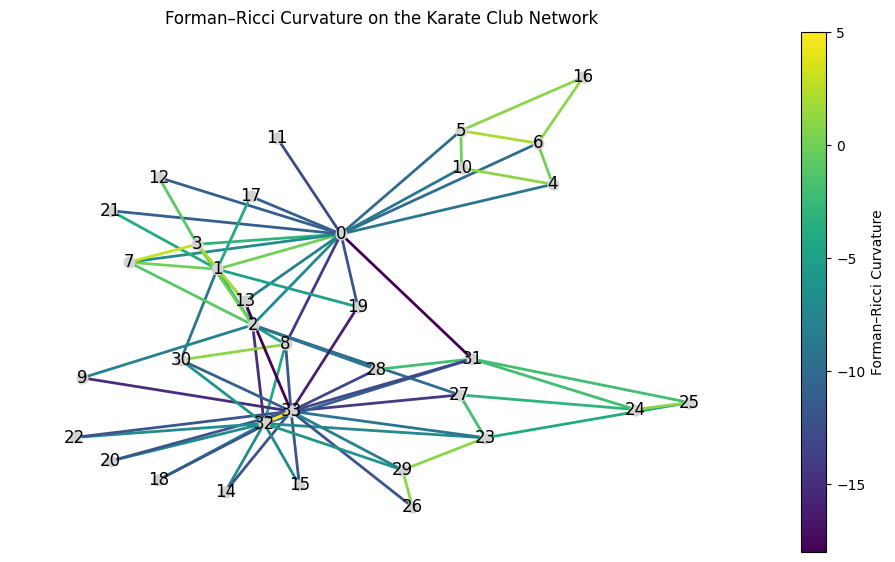

In [30]:
import matplotlib as mpl

edge_weights = [d["formanCurvature"] for _, _, d in frc.G.edges(data=True)]

cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_colors = [cmap(norm(w)) for w in edge_weights]

ratio=0.75
fig, ax = plt.subplots(figsize=(ratio*16,ratio*9))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G,
    pos,
    ax=ax,
    with_labels=True,
    edge_color=edge_colors,
    width=2,
    node_color="lightgray",
    node_size=60
)

sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Forman–Ricci Curvature")

plt.title("Forman–Ricci Curvature on the Karate Club Network")
plt.show()

---

## 6. Summary and Interpretation

* **Graph theory** provides basic descriptors (degree, centrality, density).
* **Topology** (Euler characteristic) captures higher-order connectivity beyond edges.
* **Geometry** (Forman–Ricci curvature) reveals local structural roles of edges.

Together, these tools allow us to analyze networks not only as collections of nodes and edges, but as **geometric and topological objects**.

---

## 7. Exercises

1. Compute the Euler characteristic using different values of `k`. How does it change?
2. Identify edges with most negative curvature. What is their role in the network?
3. Compare degree centrality with curvature: are highly connected nodes always in positively curved regions?
4. Compute all the measures provided for the "*les miserables graph*" (***Hint:*** use networkx documentation for generating such graph.).